In [1]:
# Importing the required libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 


# use to set style of background of plot
sns.set(style="whitegrid")
pd.set_option('display.max_colwidth', None)
%matplotlib inline
import plotly.express as px

import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score,  classification_report, f1_score
import category_encoders as ce 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# Importing data

In [2]:
# Generating Column Name manually.
cols=[ 'buying','maint','doors','persons','lug_boot','safety','class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names = cols)
data.head()
data1=data.copy()

## DATA EXPLORATION

In [3]:
# showing the data type for each column
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Let's take a look at the data

In [4]:
# checking the data types and record count for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
# Printing the number of records and number of columns in the data by using shape method of dataframe
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1728 rows and 7 columns.


In [6]:
# Display unique values of all the columns and their count
for col in cols:
    print('Variable: ',col)
    print()
    print(data[col].value_counts())
    print("------------------------------------------------------")
    print()

Variable:  buying

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
------------------------------------------------------

Variable:  maint

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
------------------------------------------------------

Variable:  doors

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
------------------------------------------------------

Variable:  persons

2       576
4       576
more    576
Name: persons, dtype: int64
------------------------------------------------------

Variable:  lug_boot

small    576
med      576
big      576
Name: lug_boot, dtype: int64
------------------------------------------------------

Variable:  safety

low     576
med     576
high    576
Name: safety, dtype: int64
------------------------------------------------------

Variable:  class

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
-------------------

In [7]:
data['doors'].unique()
# data.replace('5more','5',inplace=True)
# data.replace('more','5',inplace=True)
# data['persons'].value_counts()
# data['doors']=data['doors'].astype(int)
# data['persons']=data['persons'].astype(int)

array(['2', '3', '4', '5more'], dtype=object)

## Checking for duplicate values

In [8]:
data[data.duplicated() == True] ## get total number of duplicate values

,buying,maint,doors,persons,lug_boot,safety,class


## Checking for missing values in the data

In [9]:
data.isnull().sum() ## check the missing values in the data

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Generating insights from data

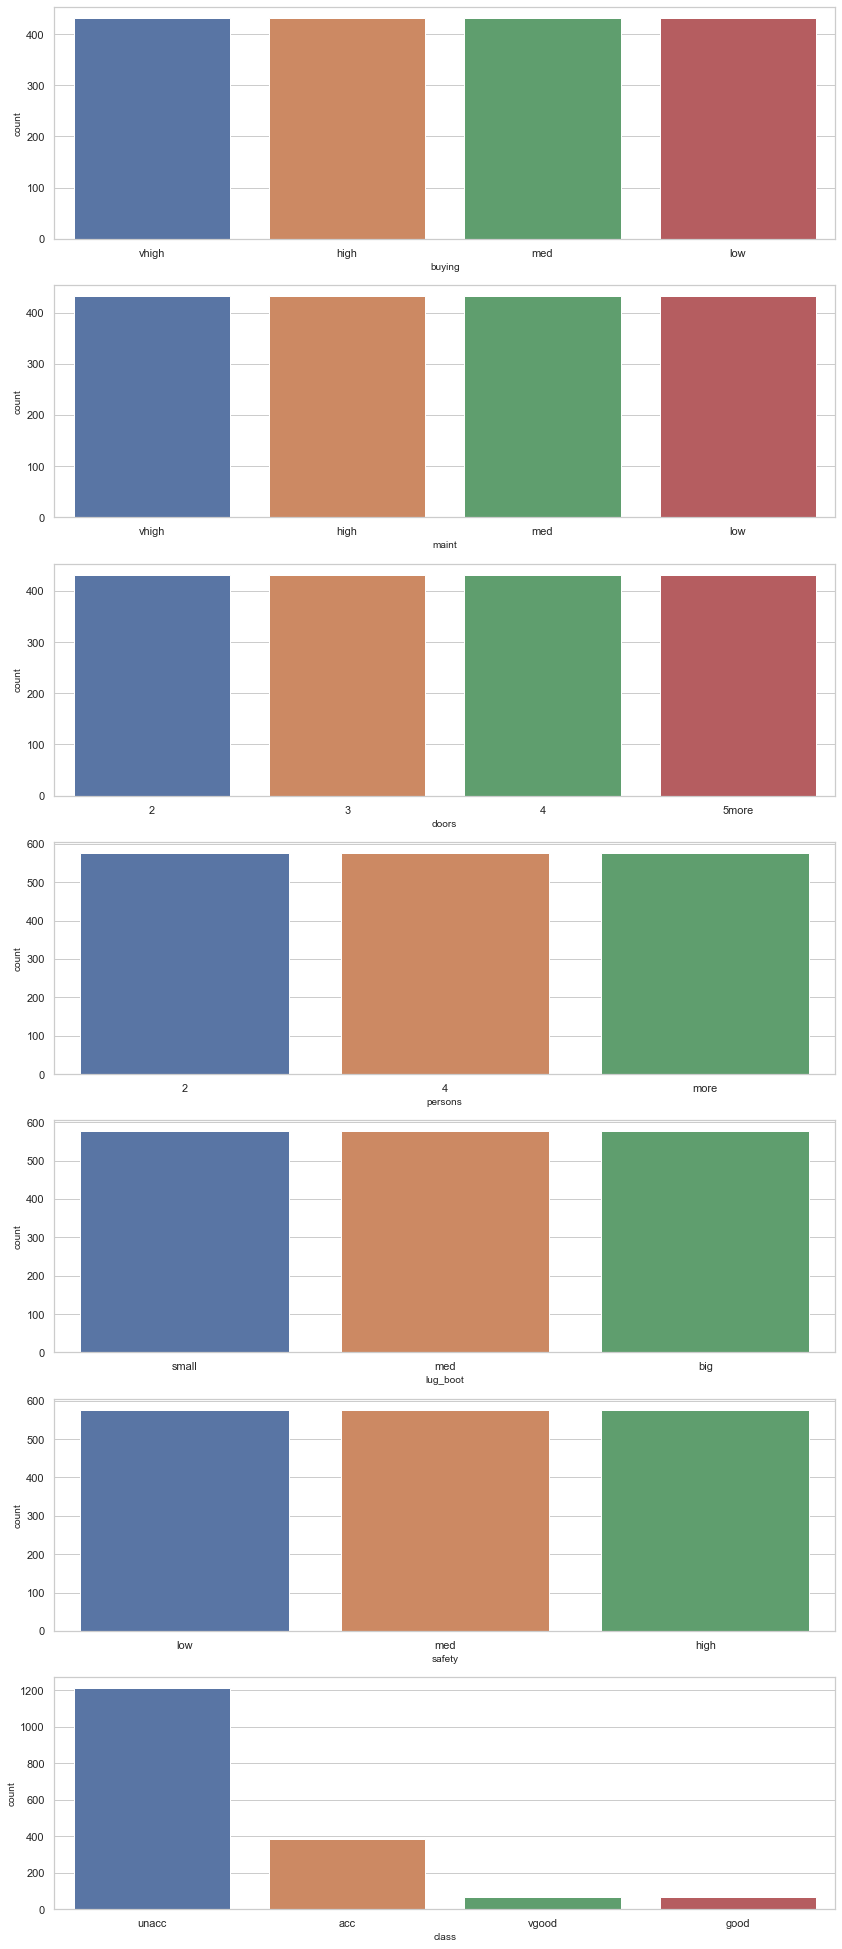

In [10]:
# Visualizaing the distribution of unique values on all data
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(7,1,figsize=(14,35))
for i, col in enumerate(cols):
    sns.countplot(data=data,
                x=col,
                ax=ax[i])

## DATA PREPROCESSING

## Converting categorical variables into numerical

In [11]:
# Creating a map for categorical values in data
buying_dict   = {'vhigh': 4, 'high': 3,'med':2, 'low':1}
maint_dict    = {'vhigh': 4, 'high': 3,'med':2, 'low':1}
doors_dict    = {'2':2,'3':3, '4':4, '5more': 4}
persons_dict   = {'2':2,'4':4, 'more': 4}
lug_boot_dict = {'small':1, 'med':2,'big':4}
safety_dict   = {'low':1, 'med':2,'high':4}
class_dict    = { 'unacc':0, 'acc':1, 'good':2, 'vgood':3}

In [12]:
# mapping data against the map we created
data['buying'] = data['buying'].map(buying_dict)
data['maint'] = data['maint'].map(maint_dict)
data['doors'] = data['doors'].map(doors_dict)
data['persons'] = data['persons'].map(persons_dict)
data['lug_boot'] = data['lug_boot'].map(lug_boot_dict)
data['safety'] = data['safety'].map(safety_dict)
data['class'] = data['class'].map(class_dict)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,4,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


## Correlation plot

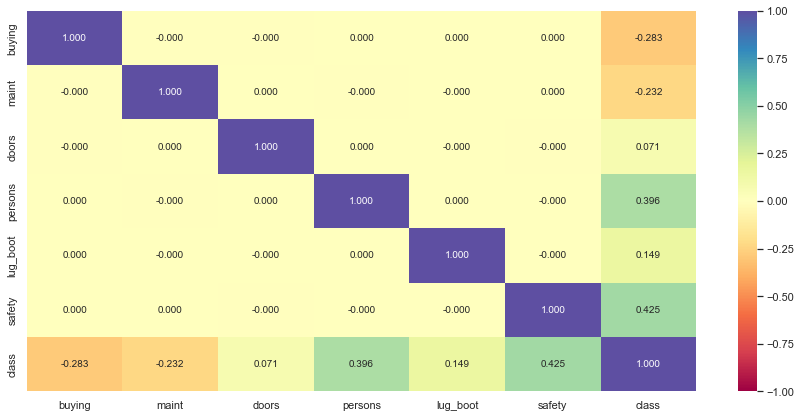

In [13]:
# Correlation plot to demonstrate how columns are correlated with each other
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral"
)
plt.show()

## Split the data

In [14]:
# Spliting the data to attributes and target category to predict
X = data.drop('class',axis=1)
y = data['class']



## Splitting the dataset into the Training set and Test set


In [15]:
# Splitting data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



# Hyperparameter tunning to find best model

In [16]:
#model with different parameters

model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
           'C': [0.1, 1, 5], 
           
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [25, 50,500],
            'max_features': ['sqrt', 'log2', None],
            'max_depth': [3, 6, 9],
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    'knn' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,5,10]
        }
    },
    'decision tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
              'max_depth':[3,5],
              
        }
    },
    'xgboost' : {
        'model': XGBClassifier(),
        'params': {
           'n_estimators': [1,5,10],
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
        }
    }
}


In [17]:
#Using GridSearchCV to get the score for the models we had defined above, along with their best parameters

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svc,0.963757,{'C': 5}
1,random_forest,0.911301,"{'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 25}"
2,knn,0.940588,{'n_neighbors': 1}
3,decision tree,0.869614,{'max_depth': 5}
4,xgboost,0.939073,"{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.6}"


In [18]:
# printing the best model
best_model=np.array(df[df['best_score']==df['best_score'].max()]['model'])[0]
print("By looking at above table we can say that",best_model,"is performing best" )


By looking at above table we can say that svc is performing best


# Further analysis using best model

In [19]:
#fit data using the model we had concluded from hyperparameter tuning
clf=SVC(C=5)
clf.fit(X_train,y_train)

SVC(C=5)

In [20]:
#predict data

y_pred=clf.predict(X_test)


In [21]:
#actual vs predicted

frame={'Predict': y_pred,'Real': y_test}
df_clf=pd.DataFrame(frame)
df_clf.head()

,Predict,Real
1318,0,0
124,0,0
648,0,0
249,0,0
1599,0,0


In [22]:
#accuracy of the model


accuracy_score(y_pred,y_test)

0.9768518518518519

In [23]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
   # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")  
   

In [24]:
#model evalution

yp_train = clf.predict(X_train)
yp_test = clf.predict(X_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       914
           1       0.95      0.96      0.96       285
           2       0.96      0.90      0.92        48
           3       0.96      1.00      0.98        49

    accuracy                           0.98      1296
   macro avg       0.96      0.96      0.96      1296
weighted avg       0.98      0.98      0.98      1296

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       296
           1       0.95      0.96      0.95        99
           2       0.95      0.95      0.95        21
           3       0.88      0.94      0.91        16

    accuracy                           0.98       432
   macro avg       0.94      0.96      0.95       432
weighted avg       0.98      0.98    

In [25]:
#confusion matrix

print(confusion_matrix(y_test, y_pred)) 

[[292   4   0   0]
 [  2  95   1   1]
 [  0   0  20   1]
 [  0   1   0  15]]


## Load data into pickle file

In [26]:
import pickle

# save the model to disk
filename = 'class_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))